In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumGothic')
train_df = pd.read_csv('jejuData/train.csv')
test_df = pd.read_csv('jejuData/test.csv')
international_df = pd.read_csv('jejuData/international_trade.csv')

In [3]:
train_df.head(5)

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0


In [4]:
international_df.head(5)

,기간,품목명,수출 중량,수출 금액,수입 중량,수입 금액,무역수지
0,2019-01,토마토(신선한 것이나 냉장한 것으로 한정한다),356571,990,0,0,990
1,2019-01,양파,821330,222,4003206,1118,-896
2,2019-01,쪽파,60,1,93405,128,-127
3,2019-01,꽃양배추와 브로콜리(broccoli),160,1,638913,563,-562
4,2019-01,방울다다기 양배추,0,0,7580,38,-38


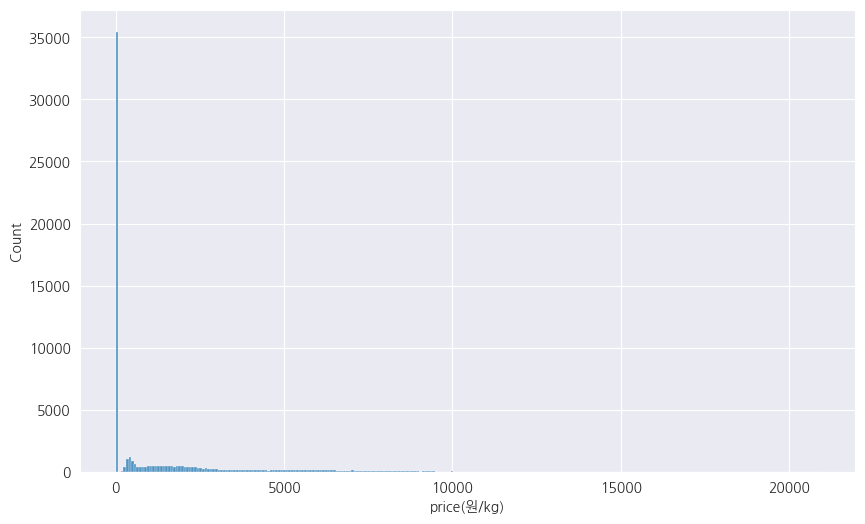

In [5]:
plt.rcParams["figure.figsize"] = (10,6)
sns.histplot(train_df['price(원/kg)'])
plt.show()

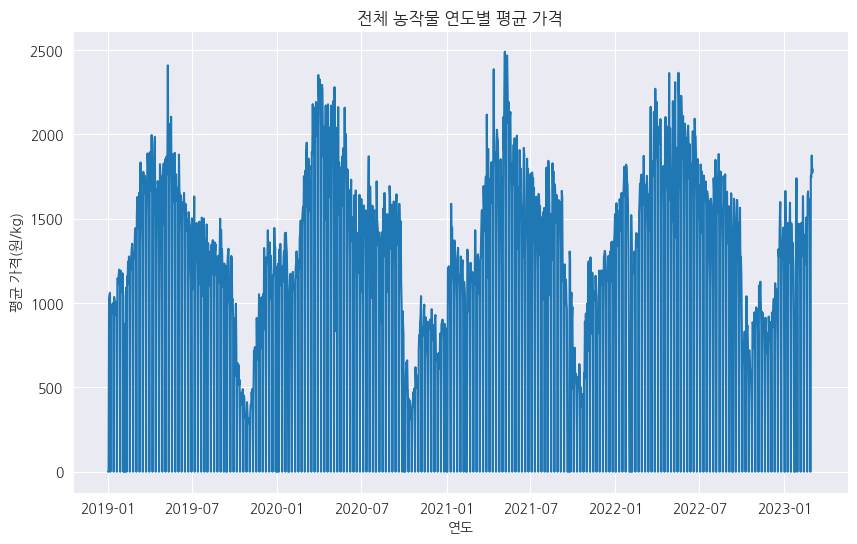

In [6]:
# timestamp 컬럼을 datetime 형식으로 변환
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])

# 연도별 평균 가격 계산
year_price = train_df.groupby('timestamp').agg({'price(원/kg)':'mean'})

# 그래프 출력
plt.plot(year_price.index, year_price['price(원/kg)'])
plt.xlabel('연도')
plt.ylabel('평균 가격(원/kg)')
plt.title('전체 농작물 연도별 평균 가격')
plt.show()

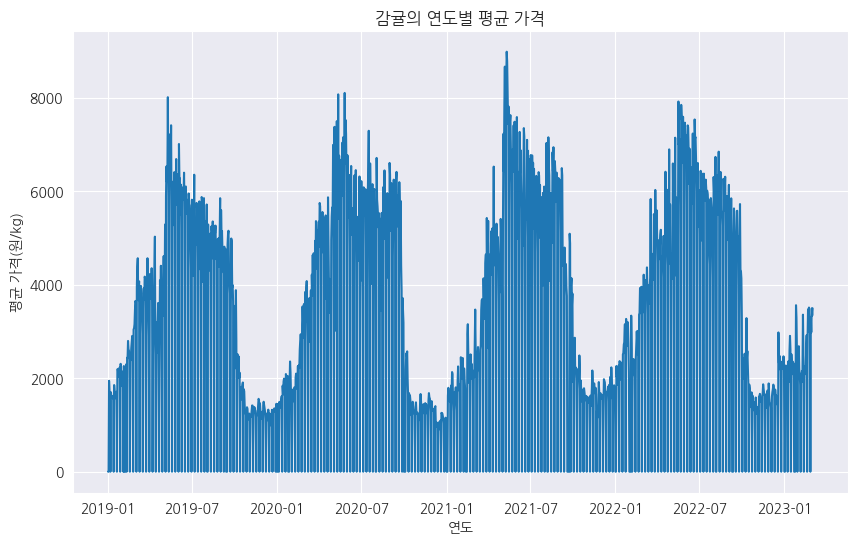

In [7]:
# item 이름이 TG(감귤)인 데이터만 선택
df = train_df[train_df['item'] == 'TG']

# timestamp 컬럼을 datetime 형식으로 변환
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 연도별 평균 가격 계산
year_price = df.groupby('timestamp').agg({'price(원/kg)':'mean'})

# 그래프 출력
plt.plot(year_price.index, year_price['price(원/kg)'])
plt.xlabel('연도')
plt.ylabel('평균 가격(원/kg)')
plt.title('감귤의 연도별 평균 가격')
plt.show()

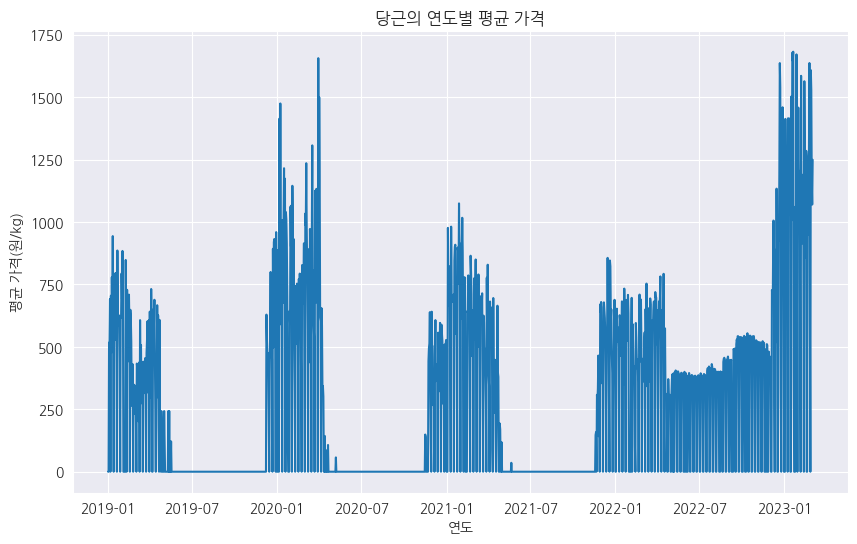

In [8]:
# item 이름이 TG(감귤)인 데이터만 선택
df = train_df[train_df['item'] == 'CR']

# timestamp 컬럼을 datetime 형식으로 변환
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 연도별 평균 가격 계산
year_price = df.groupby('timestamp').agg({'price(원/kg)':'mean'})

# 그래프 출력
plt.plot(year_price.index, year_price['price(원/kg)'])
plt.xlabel('연도')
plt.ylabel('평균 가격(원/kg)')
plt.title('당근의 연도별 평균 가격')
plt.show()

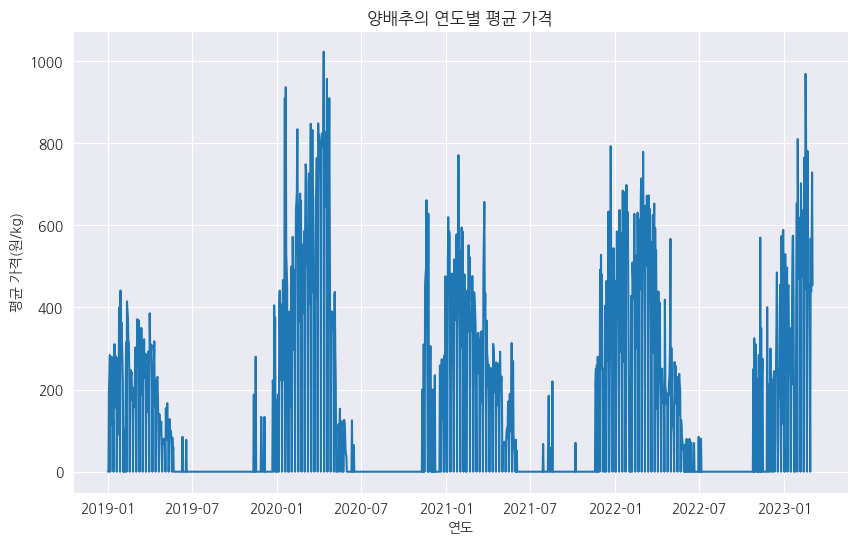

In [9]:
# item 이름이 TG(감귤)인 데이터만 선택
df = train_df[train_df['item'] == 'CB']

# timestamp 컬럼을 datetime 형식으로 변환
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 연도별 평균 가격 계산
year_price = df.groupby('timestamp').agg({'price(원/kg)':'mean'})

# 그래프 출력
plt.plot(year_price.index, year_price['price(원/kg)'])
plt.xlabel('연도')
plt.ylabel('평균 가격(원/kg)')
plt.title('양배추의 연도별 평균 가격')
plt.show()

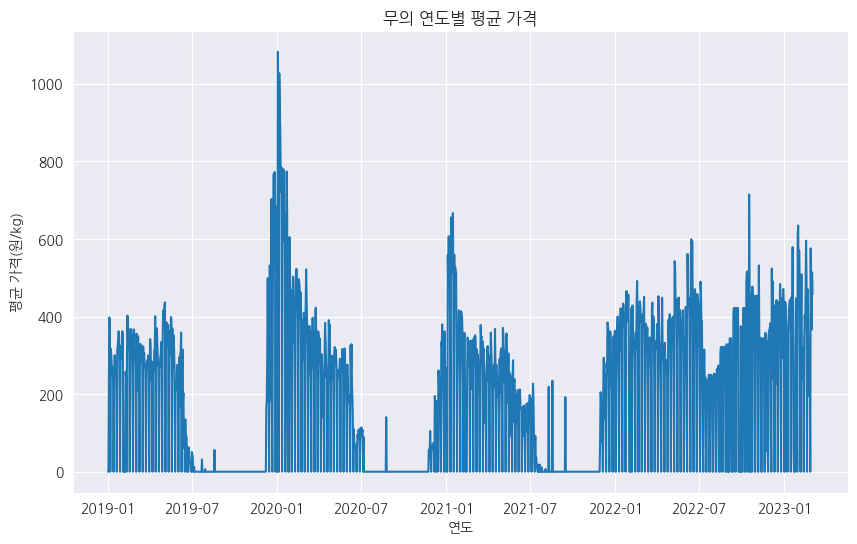

In [10]:
# item 이름이 TG(감귤)인 데이터만 선택
df = train_df[train_df['item'] == 'RD']

# timestamp 컬럼을 datetime 형식으로 변환
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 연도별 평균 가격 계산
year_price = df.groupby('timestamp').agg({'price(원/kg)':'mean'})

# 그래프 출력
plt.plot(year_price.index, year_price['price(원/kg)'])
plt.xlabel('연도')
plt.ylabel('평균 가격(원/kg)')
plt.title('무의 연도별 평균 가격')
plt.show()

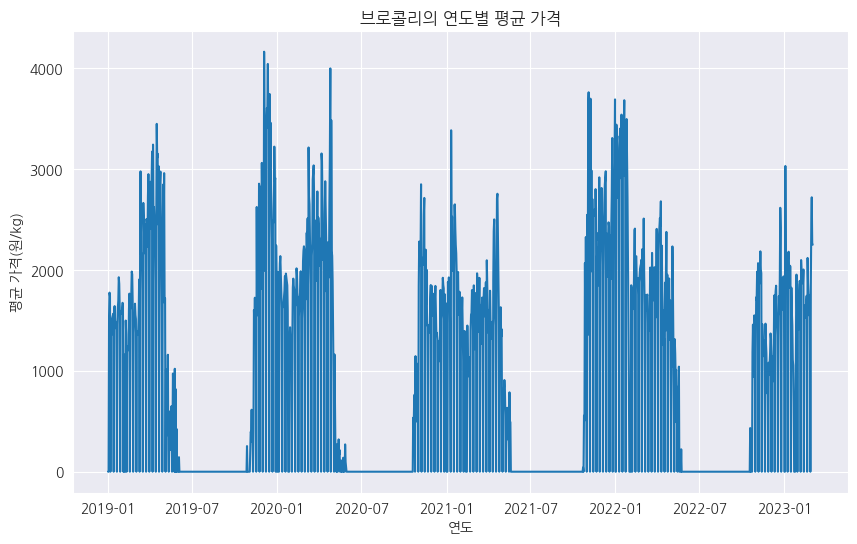

In [11]:
# item 이름이 브로콜리인 데이터만 선택
df = train_df[train_df['item'] == 'BC']

# timestamp 컬럼을 datetime 형식으로 변환
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 연도별 평균 가격 계산
year_price = df.groupby('timestamp').agg({'price(원/kg)':'mean'})

# 그래프 출력
plt.plot(year_price.index, year_price['price(원/kg)'])
plt.xlabel('연도')
plt.ylabel('평균 가격(원/kg)')
plt.title('브로콜리의 연도별 평균 가격')
plt.show()

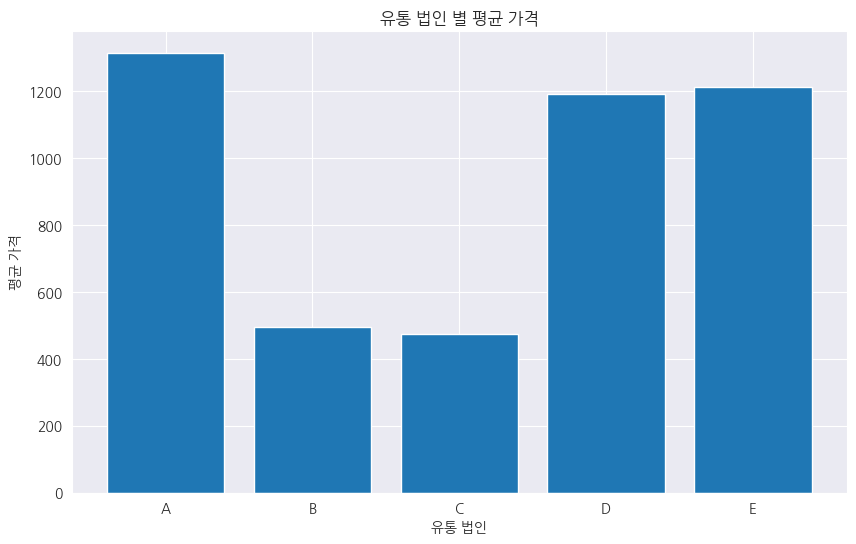

In [12]:
# 유통 법인별 평균 가격 계산
corporation_average_price = df.groupby("corporation")["price(원/kg)"].mean()

# 그래프 생성
plt.bar(corporation_average_price.index, corporation_average_price)
plt.xlabel("유통 법인")
plt.ylabel("평균 가격")
plt.title('유통 법인 별 평균 가격')
plt.show()

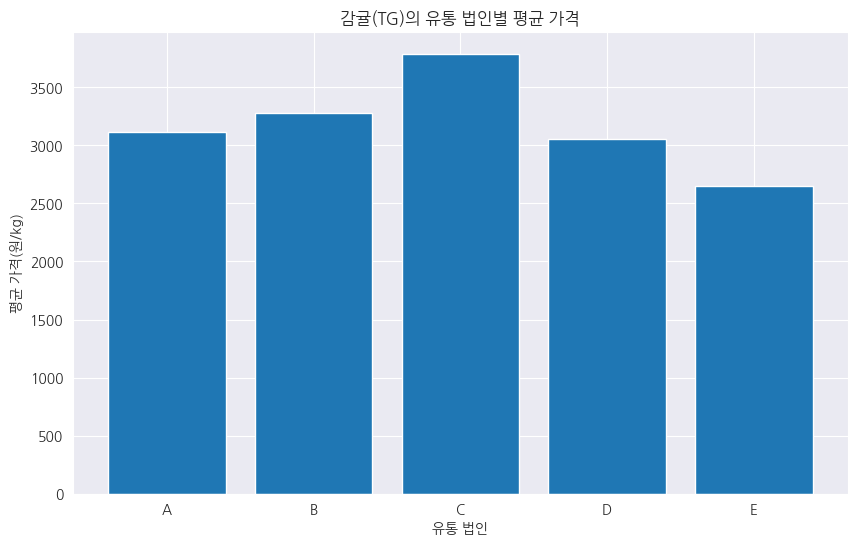

In [13]:
# item 이름이 감귤인 데이터만 선택
df = train_df[train_df['item'] == 'TG']

# 유통 법인별 평균 가격 계산
corporation_price = df.groupby('corporation').agg({'price(원/kg)':'mean'})

# 막대 그래프 출력
plt.bar(corporation_price.index, corporation_price['price(원/kg)'])
plt.xlabel('유통 법인')
plt.ylabel('평균 가격(원/kg)')
plt.title('감귤(TG)의 유통 법인별 평균 가격')
plt.show()

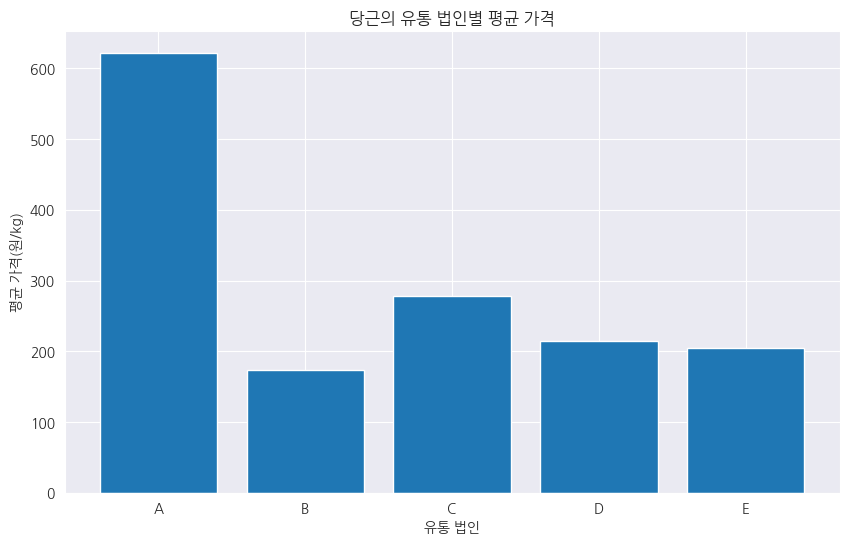

In [14]:
# item 이름이 당근인 데이터만 선택
df = train_df[train_df['item'] == 'CR']

# 유통 법인별 평균 가격 계산
corporation_price = df.groupby('corporation').agg({'price(원/kg)':'mean'})

# 막대 그래프 출력
plt.bar(corporation_price.index, corporation_price['price(원/kg)'])
plt.xlabel('유통 법인')
plt.ylabel('평균 가격(원/kg)')
plt.title('당근의 유통 법인별 평균 가격')
plt.show()

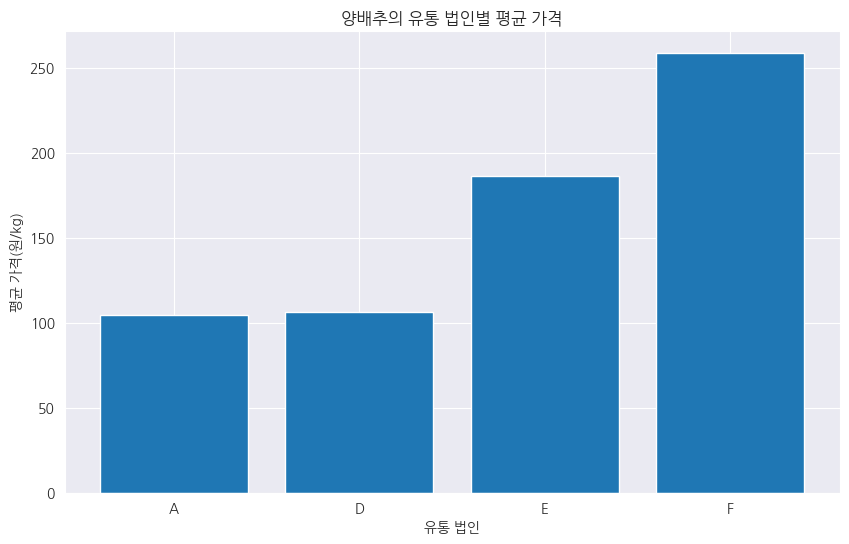

In [15]:
# item 이름이 당근인 데이터만 선택
df = train_df[train_df['item'] == 'CB']

# 유통 법인별 평균 가격 계산
corporation_price = df.groupby('corporation').agg({'price(원/kg)':'mean'})

# 막대 그래프 출력
plt.bar(corporation_price.index, corporation_price['price(원/kg)'])
plt.xlabel('유통 법인')
plt.ylabel('평균 가격(원/kg)')
plt.title('양배추의 유통 법인별 평균 가격')
plt.show()

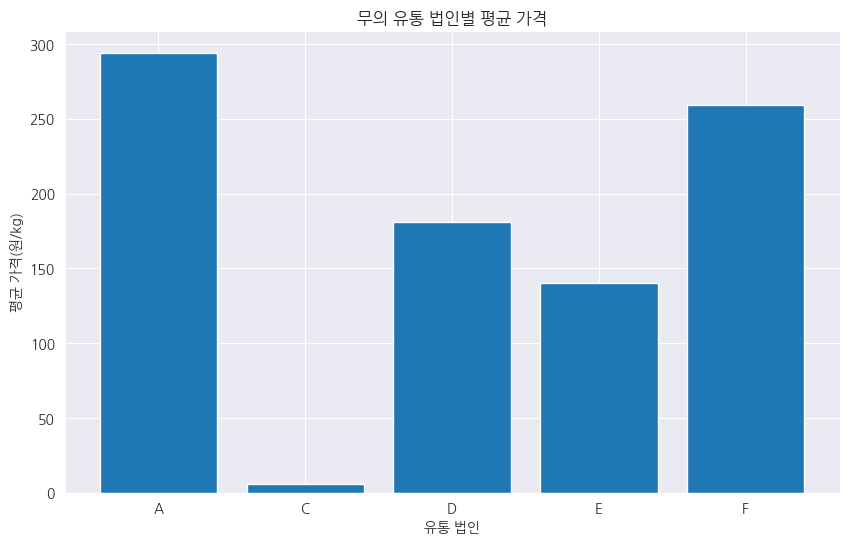

In [16]:
# item 이름이 당근인 데이터만 선택
df = train_df[train_df['item'] == 'RD']

# 유통 법인별 평균 가격 계산
corporation_price = df.groupby('corporation').agg({'price(원/kg)':'mean'})

# 막대 그래프 출력
plt.bar(corporation_price.index, corporation_price['price(원/kg)'])
plt.xlabel('유통 법인')
plt.ylabel('평균 가격(원/kg)')
plt.title('무의 유통 법인별 평균 가격')
plt.show()

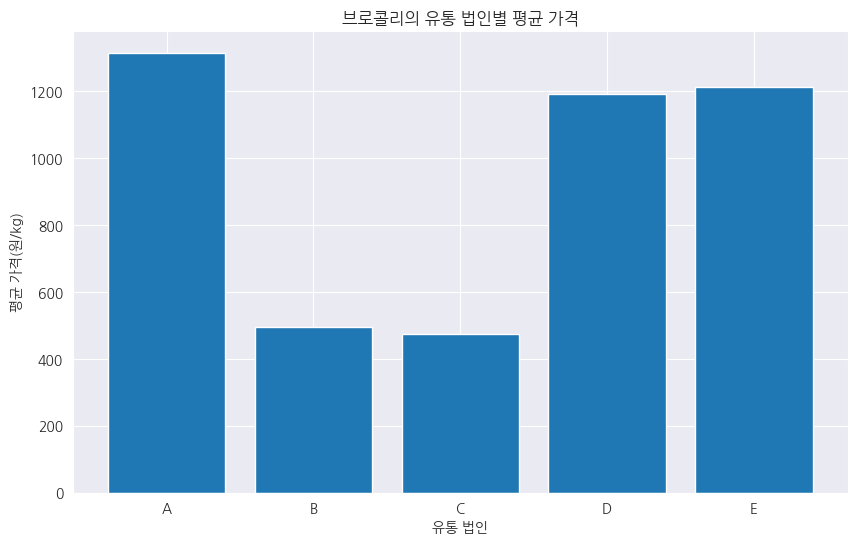

In [17]:
# item 이름이 당근인 데이터만 선택
df = train_df[train_df['item'] == 'BC']

# 유통 법인별 평균 가격 계산
corporation_price = df.groupby('corporation').agg({'price(원/kg)':'mean'})

# 막대 그래프 출력
plt.bar(corporation_price.index, corporation_price['price(원/kg)'])
plt.xlabel('유통 법인')
plt.ylabel('평균 가격(원/kg)')
plt.title('브로콜리의 유통 법인별 평균 가격')
plt.show()

In [18]:
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'], format='%Y-%m-%d')
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'], format='%Y-%m-%d')

In [19]:
#시계열 특성을 학습에 반영하기 위해 timestamp를 월, 일, 시간으로 나눕니다
train_df['year'] = train_df['timestamp'].dt.year
train_df['month'] = train_df['timestamp'].dt.month
train_df['day'] = train_df['timestamp'].dt.day

test_df['year'] = test_df['timestamp'].dt.year
test_df['month'] = test_df['timestamp'].dt.month
test_df['day'] = test_df['timestamp'].dt.day

In [20]:
# 연 기준 며칠 째인지
train_df['day_of_year'] = train_df['timestamp'].dt.dayofyear
test_df['day_of_year'] = test_df['timestamp'].dt.dayofyear

# 요일 0 = monday, 6 = sunday
train_df['day_of_week'] = train_df['timestamp'].dt.dayofweek
test_df['day_of_week'] = test_df['timestamp'].dt.dayofweek

# 주말 여부
train_df['holiday'] = train_df.apply(lambda x : 0 if x['day_of_week'] < 5 else 1, axis = 1)
test_df['holiday'] = test_df.apply(lambda x : 0 if x['day_of_week'] < 5 else 1, axis = 1)

In [21]:
# 요일별 평균 판매가격 계산
df_day_of_week_price = train_df.groupby("day_of_week")["price(원/kg)"].mean()

# 막대 그래프에 필요한 데이터 추출
day_of_week = df_day_of_week_price.index.to_list()
prices = df_day_of_week_price.values.tolist()

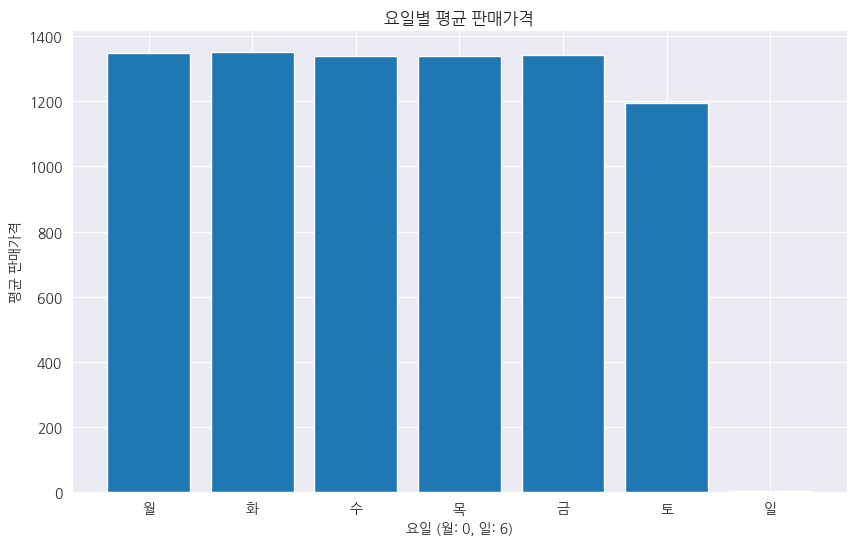

In [22]:
# 막대 그래프 생성
plt.bar(day_of_week, prices)

# x축 라벨 설정
plt.xlabel("요일 (월: 0, 일: 6)")
plt.xticks(day_of_week, ["월", "화", "수", "목", "금", "토", "일"])

# y축 라벨 설정
plt.ylabel("평균 판매가격")

# 그래프 제목 설정
plt.title("요일별 평균 판매가격")

# 그래프 표시
plt.show()

In [23]:
# 날짜 데이터 처리
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
test_df['timestamp'] = pd.to_datetime(test_df['timestamp'])

# timestamp는 연, 월, 일, 요일로 변환하여 사용
train_df['year'] = train_df['timestamp'].dt.year
train_df['month'] = train_df['timestamp'].dt.month
train_df['day'] = train_df['timestamp'].dt.day
train_df['weekday'] = train_df['timestamp'].dt.weekday

test_df['year'] = test_df['timestamp'].dt.year
test_df['month'] = test_df['timestamp'].dt.month
test_df['day'] = test_df['timestamp'].dt.day
test_df['weekday'] = test_df['timestamp'].dt.weekday

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# 범주형 변수와 수치형 변수 처리
categorical_features = ['item', 'corporation', 'location', 'year', 'month', 'day', 'weekday']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

In [25]:
# 결측치 체크
missing_values = test_df.isna().sum()
missing_values

ID             0
timestamp      0
item           0
corporation    0
location       0
year           0
month          0
day            0
day_of_year    0
day_of_week    0
holiday        0
weekday        0
dtype: int64

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [27]:
# Pipeline 객체를 활용하여 데이터 전처리와 모델 훈련을 연속적으로 수행
# 파이프라인 생성
model_pipeline = Pipeline([
    ('transformer', transformer),
    ('model', RandomForestRegressor())
])

In [28]:
# XGBoost 모델 파라미터 그리드 정의
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 7],
    'model__colsample_bytree': [0.7, 0.8],
    'model__subsample': [0.7, 0.8]
}

In [29]:
# 데이터 분할
X = train_df.drop(['price(원/kg)', 'supply(kg)', 'timestamp', 'ID'], axis=1)
y = train_df['price(원/kg)']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# 모델 훈련
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot', OneHotEncoder(),
                                                  ['item', 'corporation',
                                                   'location', 'year', 'month',
                                                   'day', 'weekday'])])),
                ('model', RandomForestRegressor())])

In [35]:
# 성능측정
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# 검증 데이터에서 성능 평가
valid_predictions = model_pipeline.predict(X_valid)
valid_predictions = np.where(valid_predictions < 0, 0, valid_predictions) # 예측값이 -인 경우 0으로 처리
mse = mean_squared_error(y_valid, valid_predictions)
mae = mean_absolute_error(y_valid, valid_predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"RMSE: {rmse}")

Mean Squared Error: 738630.0887517845
Mean Absolute Error: 306.0855757575758
RMSE: 859.4359131149829
